# Data Cleaning

In [20]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np

In [3]:
# Read the data

data = pd.read_csv('smog_data.csv')

In [4]:
# Add a column to indicate if the car model is all wheel drive or four wheel drive.
# !!: For Porsche models they needs to be specified manually
data['AllOrFourWheelDrive'] = data['Model'].str.contains('AWD|quattro|xDrive|4WD|4X4|ALL4|4MOTION|4MATIC')

In [6]:
# process Porsche models 
# based on lthis website: https://www.rusnakpasadenaporsche.com/which-porsche-models-come-with-all-wheel-drive/#:~:text=Every%20Porsche%20delivers%20the%20dynamic,the%20718%20Boxster%20and%20Cayman.
# only 718 Boxster and 718 Cayman are not in AWD
porscheMake = data['Model'][data['Make'].str.contains('Porsche')]
index_list = data.index[data['Make']=='Porsche'].tolist()
for ind in index_list:
  if ('718 Boxster' in porscheMake[ind] or '718 Cayman' in porscheMake[ind]):
    data.at[ind,'AllOrFourWheelDrive'] = False
  else:
    data.at[ind,'AllOrFourWheelDrive'] = True

In [8]:
# Seperate number of gears from the Transmission column. 
# Never run this cell after running the next cell (i.e. removing numbers from Transmission)
index_list = data.index[data['Transmission']=='AV'].tolist()
extrac_val = data['Transmission'].str.extract('(\d+)').values
ele_list = []
for ele in extrac_val:
  if not pd.isna(ele[0]):
    ele_list.append(int(ele[0]))
mean_val = statistics.mean(ele_list)
for index in index_list:
  data.at[index,'Transmission'] = 'AV'+str(mean_val)
data['NumberOfGears'] = data['Transmission'].str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
data['NumberOfGears'].head()

data['isCVT'] = data['Transmission'].str.contains('AV')

[139, 140, 193, 225, 243, 244, 298, 299, 339, 429, 432, 433, 436, 439, 442, 443, 444, 445, 461, 464, 533, 536, 550, 717, 723, 724, 728, 740, 741, 744, 874, 875, 876, 877, 885, 893, 894, 895, 896, 903, 905, 906, 915]


In [9]:
# Only keep the transmission type as categorical variable in Transmission column.
data['Transmission'] = data['Transmission'].str.replace('([-+]?\d*\.\d+|\d+)', '')

<ipython-input-9-2e09cecd0cbd>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Transmission'] = data['Transmission'].str.replace('([-+]?\d*\.\d+|\d+)', '')


In [11]:
# drop the co2 rating column, year column
data = data.drop('CO2 Rating', axis=1)
data = data.drop('Model Year', axis=1)

In [12]:
# Display categorical data
categorical_data = data[['Cylinders','Make','Vehicle Class','Fuel Type','Transmission','AllOrFourWheelDrive','isCVT','NumberOfGears','Smog Rating']]
matrix = pd.DataFrame()
for col in categorical_data.columns:
  # display(data[[col,'Smog Rating']].groupby(by = col).mean().sort_values(by='Smog Rating',ascending=False))
  counts = pd.DataFrame(data[col].value_counts())
  display(counts)
data = data.drop('Model', axis=1)

,Cylinders
4,404
6,295
8,197
3,21
12,17
10,8
16,3
5,1


,Make
Ford,89
Chevrolet,80
Porsche,77
BMW,60
GMC,54
Toyota,51
Audi,45
Mercedes-Benz,43
Jeep,34
Hyundai,29


,Vehicle Class
SUV: Small,197
SUV: Standard,141
Mid-size,117
Pickup truck: Standard,113
Subcompact,80
Compact,69
Full-size,64
Two-seater,51
Minicompact,48
Pickup truck: Small,20


,Fuel Type
Z,458
X,446
D,28
E,14


,Transmission
AS,366
A,262
AM,132
AV,96
M,90


,AllOrFourWheelDrive
True,532
False,414


,isCVT
False,850
True,96


,NumberOfGears
8.000000,387
10.000000,167
6.000000,152
7.000000,102
9.000000,84
7.959025,43
5.000000,7
1.000000,4


,Smog Rating
5,308
3,198
7,194
6,189
1,57


In [13]:
# Combining categories

data['Fuel Type'][(data['Fuel Type'] == "X") | (data['Fuel Type'] == "E")] = "H"
data['Fuel Type'][(data['Fuel Type'] == "Z") | (data['Fuel Type'] == "D")] = "L"

for i in data.index:
  if (int(data.at[i,'Cylinders'])<=5):
    data.at[i,'Cylinders'] = "smaller/equal to 5"
  elif (int(data.at[i,'Cylinders'])>=8):
    data.at[i,'Cylinders'] = "larger/equal to 8"
  elif (int(data.at[i,'Cylinders'])==6):
    data.at[i,'Cylinders'] = "equal to 6"

  if (int(data.at[i,'NumberOfGears']))<=6:
      data.at[i,'NumberOfGears'] = "smaller/equal to 6"


data.loc[(data['Vehicle Class']=="Two-seater")|(data['Vehicle Class']=="Minicompact"),'Vehicle Class'] = "Smallest"
data.loc[data['Vehicle Class'].isin(['Full-size', 'Pickup truck: Small','Station wagon: Small'	, 'Special purpose vehicle', 'Station wagon: Mid-size', 'Minivan']),'Vehicle Class'] = "Small"
data.loc[(data['Vehicle Class']=="Subcompact")|(data['Vehicle Class']=="Compact"),'Vehicle Class'] = "Large"

data.loc[data['NumberOfGears'].isin(["1","5","6"]), 'NumberOfGears'] = "smaller/equal to 6"
data['NumberOfGears'] = data['NumberOfGears'].astype(str)

<ipython-input-13-a15469876459>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fuel Type'][(data['Fuel Type'] == "X") | (data['Fuel Type'] == "E")] = "H"
<ipython-input-13-a15469876459>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fuel Type'][(data['Fuel Type'] == "Z") | (data['Fuel Type'] == "D")] = "L"


In [16]:
# Obtain the summary statistics table

summary = pd.DataFrame(data.loc[:,~data.columns.isin(['Cylinders', 'NumberOfGears','Smog Rating','Fuel Consumption(Comb (mpg))'])].describe()).round(3)
display(summary)

,Engine Size(L),Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km)
count,946.000,946.000,946.000,946.000,946.000
mean,3.199,12.506,9.363,11.092,259.172
std,1.375,3.452,2.285,2.876,64.443
min,1.200,4.000,3.900,4.000,94.000
25%,2.000,10.200,7.700,9.100,213.250
50%,3.000,12.200,9.200,10.800,257.000
75%,3.800,14.700,10.700,12.900,300.750
max,8.000,30.300,20.900,26.100,608.000


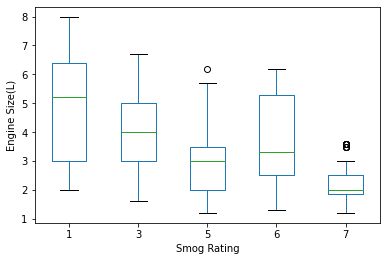

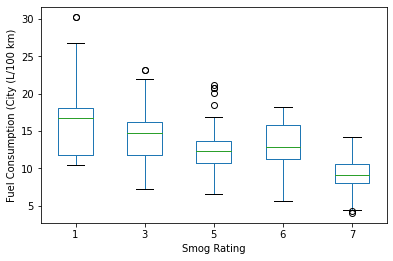

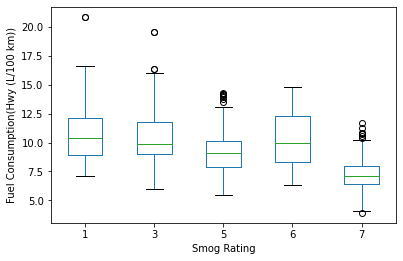

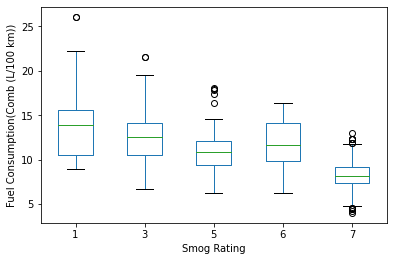

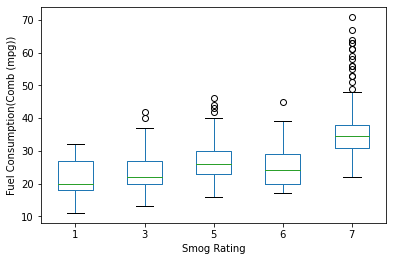

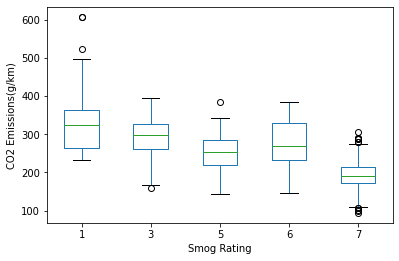

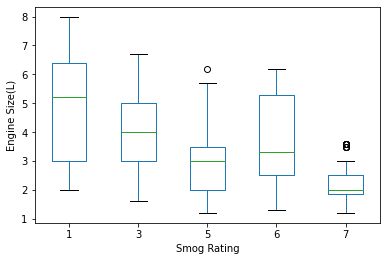

In [17]:
# Plots for continuous data

continuous_data = data[['Engine Size(L)','Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))',
                        'Fuel Consumption(Comb (L/100 km))','Fuel Consumption(Comb (mpg))','CO2 Emissions(g/km)', 'Engine Size(L)']];

for col in continuous_data.columns:
  ax = data.boxplot(column=col,by="Smog Rating",grid = False)
  plt.title('')
  plt.suptitle('')
  ax.set_title('');
  ax.set_xlabel("Smog Rating");
  ax.set_ylabel(col);
  ax = plt.show()

In [18]:
# Display categorical data after transforming
categorical_data = data[['Cylinders','Make','Vehicle Class','Fuel Type','Transmission','AllOrFourWheelDrive','isCVT','NumberOfGears','Smog Rating']]
matrix = pd.DataFrame()
for col in categorical_data.columns:
  # display(data[[col,'Smog Rating']].groupby(by = col).mean().sort_values(by='Smog Rating',ascending=False))
  counts = pd.DataFrame(data[col].value_counts())
  display(counts)

,Cylinders
smaller/equal to 5,426
equal to 6,295
larger/equal to 8,225


,Make
Ford,89
Chevrolet,80
Porsche,77
BMW,60
GMC,54
Toyota,51
Audi,45
Mercedes-Benz,43
Jeep,34
Hyundai,29


,Vehicle Class
SUV: Small,197
Large,149
SUV: Standard,141
Small,130
Mid-size,117
Pickup truck: Standard,113
Smallest,99


,Fuel Type
L,486
H,460


,Transmission
AS,366
A,262
AM,132
AV,96
M,90


,AllOrFourWheelDrive
True,532
False,414


,isCVT
False,850
True,96


,NumberOfGears
8.0,387
10.0,167
smaller/equal to 6,163
7.0,102
9.0,84
7.959025470653378,43


,Smog Rating
5,308
3,198
7,194
6,189
1,57


In [19]:
# Display the relationship between categorical features and the response variable

from pandas.core import describe
categorical_data = data[['Cylinders','Make','Vehicle Class','Fuel Type','Transmission','AllOrFourWheelDrive','isCVT','NumberOfGears','Smog Rating']]
for col in categorical_data.columns:
  table = pd.crosstab(data[col], data['Smog Rating'])
  display(table)

Smog Rating,1,3,5,6,7
Cylinders,,,,,
equal to 6,7,51,158,61,18
larger/equal to 8,38,102,28,57,0
smaller/equal to 5,12,45,122,71,176


Smog Rating,1,3,5,6,7
Make,,,,,
Acura,0,1,3,2,2
Alfa Romeo,0,6,0,0,0
Aston Martin,0,2,3,0,0
Audi,4,9,27,0,5
BMW,0,35,16,0,9
Bentley,0,8,0,0,0
Bugatti,3,0,0,0,0
Buick,0,0,0,2,7
Cadillac,0,3,6,8,9


Smog Rating,1,3,5,6,7
Vehicle Class,,,,,
Large,4,30,61,15,39
Mid-size,10,30,34,8,35
Pickup truck: Standard,6,25,23,58,1
SUV: Small,3,16,72,38,68
SUV: Standard,4,46,23,47,21
Small,4,30,51,23,22
Smallest,26,21,44,0,8


Smog Rating,1,3,5,6,7
Fuel Type,,,,,
H,0,41,152,136,131
L,57,157,156,53,63


Smog Rating,1,3,5,6,7
Transmission,,,,,
A,22,56,45,117,22
AM,20,23,69,0,20
AS,2,99,136,56,73
AV,0,7,19,11,59
M,13,13,39,5,20


Smog Rating,1,3,5,6,7
AllOrFourWheelDrive,,,,,
False,44,106,104,51,109
True,13,92,204,138,85


Smog Rating,1,3,5,6,7
isCVT,,,,,
False,57,191,289,178,135
True,0,7,19,11,59


Smog Rating,1,3,5,6,7
NumberOfGears,,,,,
10.0,2,21,38,93,13
7.0,20,14,50,0,18
7.959025470653378,0,0,8,3,32
8.0,22,122,140,39,64
9.0,0,4,21,42,17
smaller/equal to 6,13,37,51,12,50


Smog Rating,1,3,5,6,7
Smog Rating,,,,,
1,57,0,0,0,0
3,0,198,0,0,0
5,0,0,308,0,0
6,0,0,0,189,0
7,0,0,0,0,194


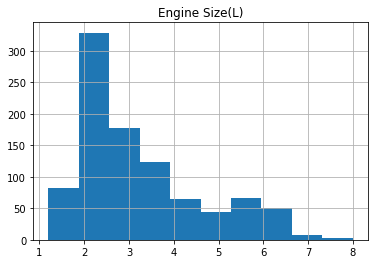

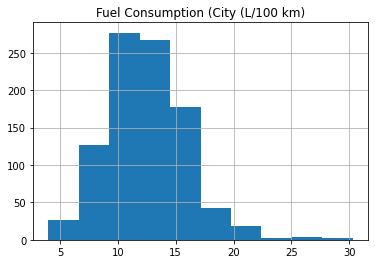

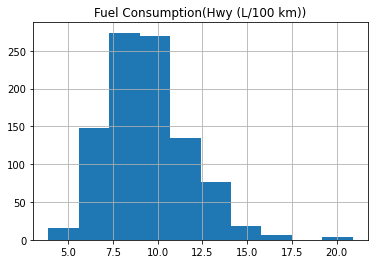

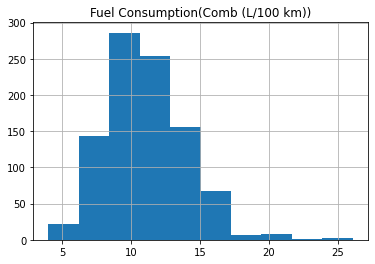

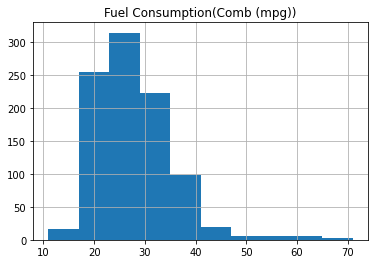

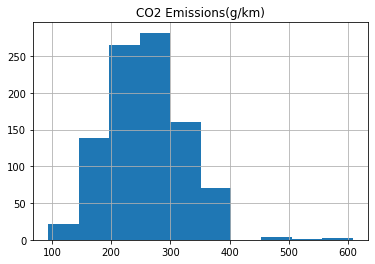

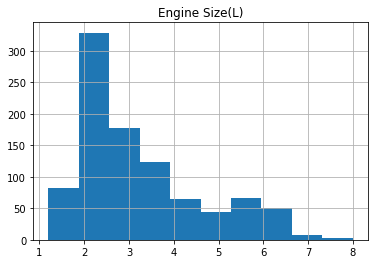

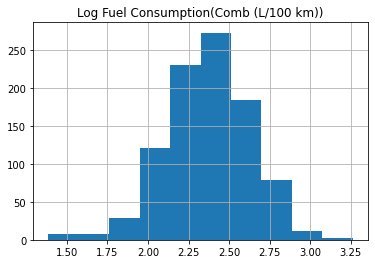

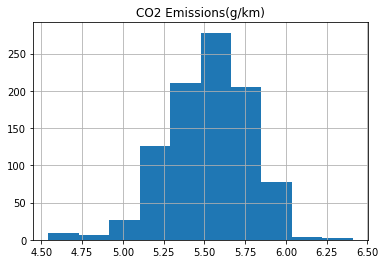

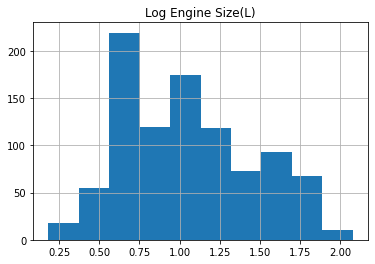

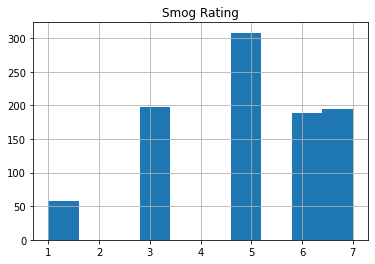

In [23]:
# Display histograms of numerical features

for col in continuous_data.columns:
  ax = data.hist(column=col)
  plt.title(col)
  plt.suptitle('')

  ax = plt.show()

# fuel consumption combined
log_comb_consumption = pd.DataFrame(np.log(data['Fuel Consumption(Comb (L/100 km))']))
ax_log = log_comb_consumption.hist(column='Fuel Consumption(Comb (L/100 km))')
plt.title('Log Fuel Consumption(Comb (L/100 km))')
ax_log = plt.show()

# CO2 Emissions(g/km)
log_comb_consumption = pd.DataFrame(np.log(data['CO2 Emissions(g/km)']))
ax_log_co2 = log_comb_consumption.hist(column='CO2 Emissions(g/km)')
ax_log_co2 = plt.show()

log_engine = pd.DataFrame(map(statistics.log,data['Engine Size(L)']))
ax = log_engine.hist()
plt.title('Log Engine Size(L)')
ax = plt.show()

response_distribution = pd.DataFrame(data['Smog Rating'])
response_distribution_plt = response_distribution.hist(column='Smog Rating')
response_distribution_plt = plt.show()

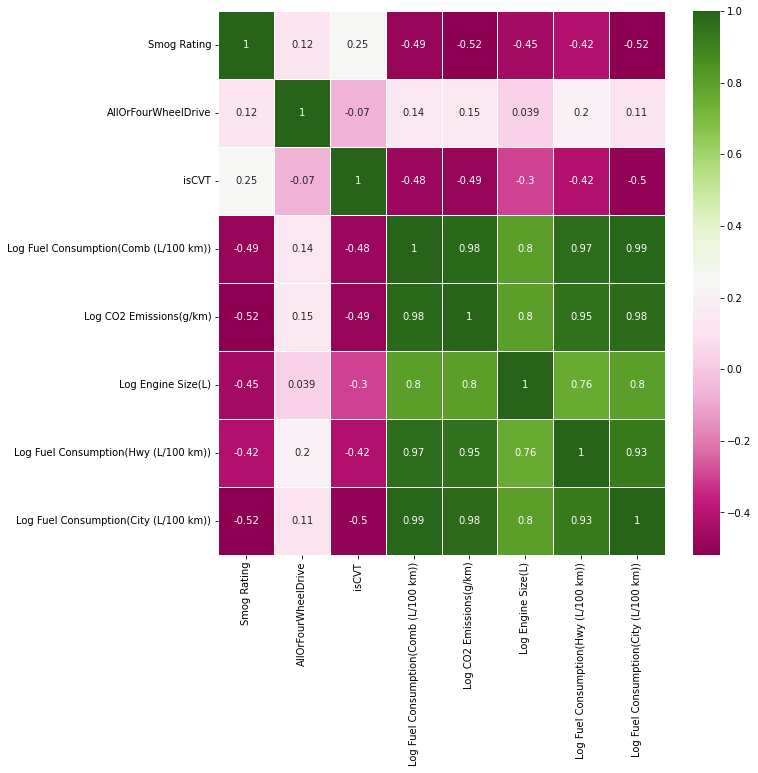

In [26]:
# Display the correlation matrix

data['Log Fuel Consumption(Comb (L/100 km))'] = np.log(data['Fuel Consumption(Comb (L/100 km))'])
data['Log CO2 Emissions(g/km)'] = np.log(data['CO2 Emissions(g/km)'])
data['Log Engine Size(L)'] = np.log(data['Engine Size(L)'])
data['Log Fuel Consumption(Hwy (L/100 km))'] = np.log(data['Fuel Consumption(Hwy (L/100 km))'])
data['Log Fuel Consumption(City (L/100 km))'] = np.log(data['Fuel Consumption (City (L/100 km)'])

remove_data = data.loc[:,~data.columns.isin(['Engine Size(L)','Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))',
                        'Fuel Consumption(Comb (L/100 km))','Fuel Consumption(Comb (mpg))','CO2 Emissions(g/km)'])]
remove_corr_matrix = remove_data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(remove_corr_matrix, annot=True, linewidths=.5, ax = ax, cmap="PiYG")
plt.show()

In [28]:
# Save the cleaned and transformed data

data.to_csv('smog_data_cleaned.csv',index=False)